In [58]:
'''
import pandas as pd
pd.set_option("display.max_rows", 550)
data = pd.read_csv("./res_fin.csv").sort_values(["count_mx__ngram_range","lda__n_components","accuracy_score","count_mx__max_df","count_mx__min_df"], ascending=[True,True,False,False,True])
data.reset_index(drop=True, inplace=True)
display(data.loc[1063:1594,])
'''

,Unnamed: 0,accuracy_score,classifier__max_depth,classifier__min_samples_leaf,count_mx__max_df,count_mx__min_df,count_mx__ngram_range,lda__learning_decay,lda__n_components
1063,2097,0.828333,17,1,0.6,4,"(1, 2)",0.9,12
1064,3,0.983333,17,1,0.5,20,"(1, 3)",0.7,6
1065,4,0.980000,17,1,80.0,7,"(1, 3)",0.9,6
1066,18,0.978333,17,1,60.0,21,"(1, 3)",0.7,6
1067,76,0.970000,17,1,0.8,21,"(1, 3)",0.7,6
1068,75,0.970000,17,1,0.7,21,"(1, 3)",0.7,6
1069,74,0.970000,17,1,0.6,21,"(1, 3)",0.7,6
1070,108,0.968333,17,1,70.0,16,"(1, 3)",0.9,6
1071,84,0.968333,17,1,0.8,8,"(1, 3)",0.7,6
1072,83,0.968333,17,1,0.7,8,"(1, 3)",0.7,6


In [1]:
from AC import preproc
from AC import get_news
import inspect
import nltk
nltk.download("stopwords")

%load_ext autoreload
%autoreload 2

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cristy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
economia = get_news("./articoli_economia/")
cultura = get_news("./articoli_cultura/")
tech = get_news("./articoli_tech/")
politica = get_news("./articoli_politica/")
sport = get_news("./articoli_sport/")
cronaca = get_news("./articoli_cronaca/")

for articolo in economia:
    articolo['categoria'] = "Economia"
for articolo in cultura:
    articolo['categoria'] = "Cultura"
for articolo in tech:
    articolo['categoria'] = "Tech"
for articolo in politica:
    articolo['categoria'] = "Politica"
for articolo in sport:
    articolo['categoria'] = "Sport"
for articolo in cronaca:
    articolo['categoria'] = "Cronaca"
dati_preprocessati =  preproc(tech + politica + cultura + economia + sport + cronaca)

100%|██████████| 2400/2400 [00:37<00:00, 64.42it/s] 


In [3]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn import linear_model,metrics
from sklearn.dummy import DummyClassifier 
from sklearn.tree import DecisionTreeClassifier
from AC import distribuzione_frequenze

In [4]:
seed = 0
train_documents,test_documents = train_test_split(dati_preprocessati,random_state=seed)
test_documents, val_documents = train_test_split(test_documents,random_state=seed,train_size=0.5)

C:\Users\Cristy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
docs_texts = [' '.join([word for word in x['testo']] + x['tags'] + x['sottotitolo'] + x['titolo_articolo']) for x in dati_preprocessati]
train_texts = [' '.join([word for word in x['testo']] + x['sottotitolo'] + x['titolo_articolo']) for x in train_documents]
test_texts = [' '.join([word for word in x['testo']] + x['sottotitolo'] + x['titolo_articolo']) for x in test_documents]
val_texts = [' '.join([word for word in x['testo']] + x['sottotitolo'] + x['titolo_articolo']) for x in val_documents]

docs_cats = [x["categoria"] for x in dati_preprocessati]
train_cats = [x["categoria"] for x in train_documents]
test_cats = [x["categoria"] for x in test_documents]
val_cats = [x["categoria"] for x in val_documents]#  magari aggiungere anche un esempio "significativo" di come erano i dati prima e dopo il preprocessamento

In [6]:
#accuracy_score 	classifier__max_depth 	classifier__min_samples_leaf 	count_mx__max_df 	count_mx__min_df 	count_mx__ngram_range 	lda__learning_decay 	lda__n_components
#0.970000 	17 	1 	80.0 	6 	(1, 2) 	0.7 	6
#0.966667 	17 	1 	0.8 	7 	(1, 2) 	0.7 	6
#0.966667 	17 	1 	0.7 	7 	(1, 2) 	0.7 	6
#0.966667 	17 	1 	0.6 	7 	(1, 2) 	0.7 	6
#0.965000 	17 	1 	80.0 	8 	(1, 2) 	0.9 	12
#0.965000 	17 	1 	0.8 	9 	(1, 2) 	0.9 	12
#0.960000 	17 	1 	0.5 	6 	(1, 2) 	0.7 	12
#0.956667 	17 	1 	0.8 	8 	(1, 2) 	0.9 	12

#0.983333 	17 	1 	0.8 	16 	(1, 3) 	0.7 	12
#0.980000 	17 	1 	80.0 	7 	(1, 3) 	0.9 	6
#0.973333 	17 	1 	0.5 	8 	(1, 3) 	0.7 	12
#0.968333 	17 	1 	0.8 	8 	(1, 3) 	0.7 	6
#0.966667 	17 	1 	60.0 	6 	(1, 3) 	0.9 	12
#0.958333 	17 	1 	0.6 	5 	(1, 3) 	0.7 	6
#0.970000 	17 	1 	0.8 	11 	(1, 3) 	0.7 	12
#0.963333 	17 	1 	0.5 	10 	(1, 3) 	0.7 	6
#0.970000 	17 	1 	0.8 	11 	(1, 3) 	0.7 	12

#0.976667 	17 	1 	0.5 	10 	(1, 1) 	0.7 	6
#0.968333 	17 	1 	0.8 	7 	(1, 1) 	0.7 	6
#0.978333 	17 	1 	0.8 	6 	(1, 1) 	0.7 	12



#0.965000 	17 	1 	0.5 	10 	(1, 3) 	0.7 	12
#0.970000 	17 	1 	0.5 	11 	(1, 3) 	0.7 	12
#0.978333 	17 	1 	0.5 	6 	(1, 1) 	0.7 	12

11

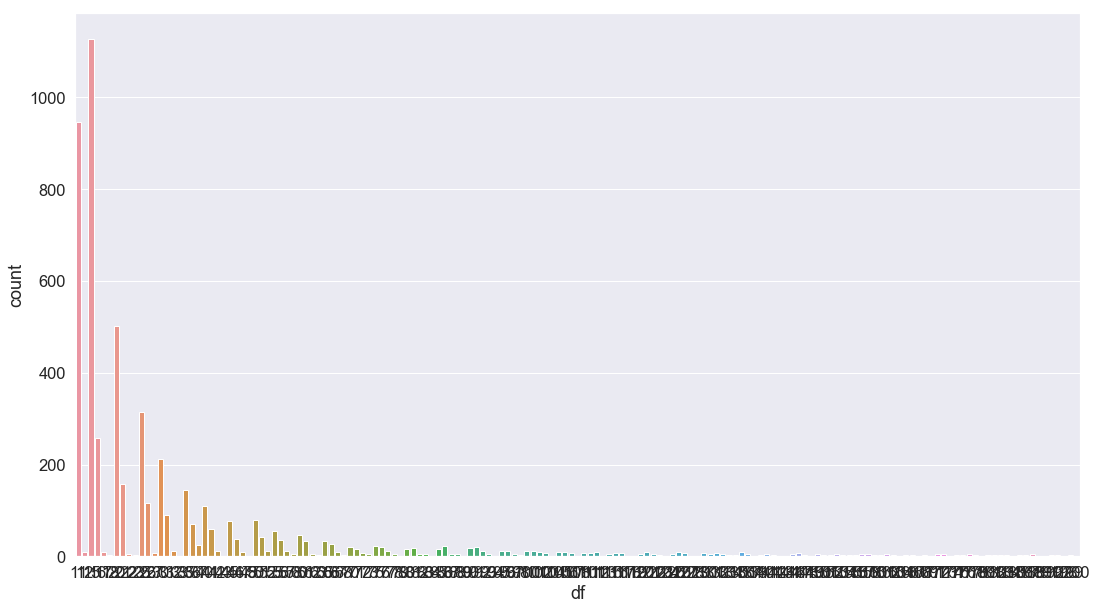

In [21]:
#0.970000 	17 	1 	0.5 	11 	(1, 3) 	0.7 	12
#0.965000 	17 	1 	0.5 	10 	(1, 3) 	0.7 	12
distribuzione_frequenze(docs_texts,"train",ngrammi=(1,3),min_df=11,max_df=200)

6

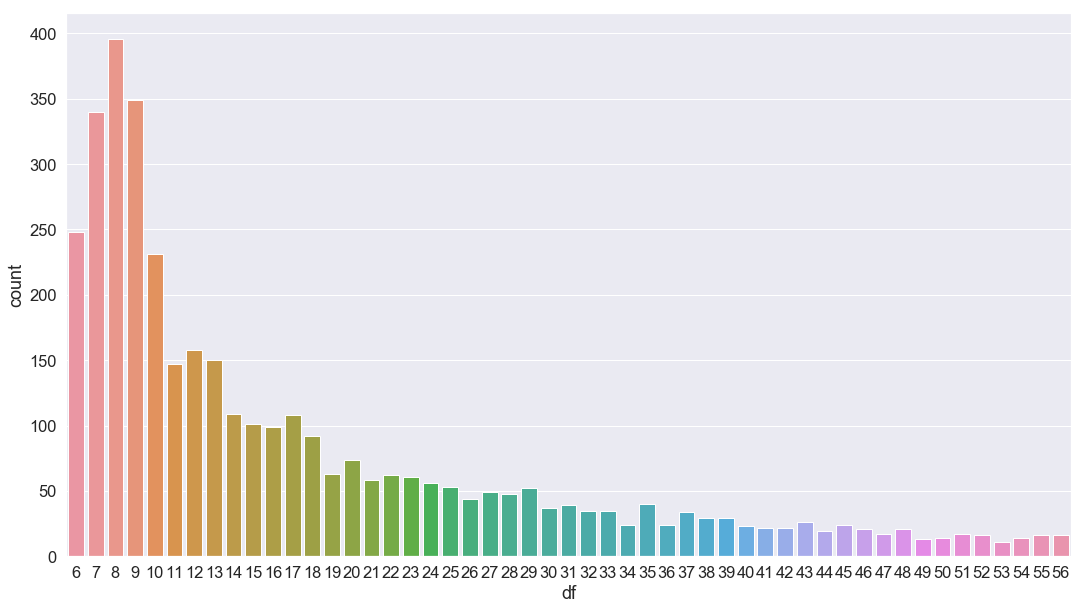

In [14]:
#0.978333 	17 	1 	0.5 	6 	(1, 1) 	0.7 	12
distribuzione_frequenze(train_texts,"train",ngrammi=(1,1),min_df=6,max_df=56)

In [ ]:
#Magari inserire il tSNE

In [ ]:
#Ed eventualmente termini più probabili per topic